# OECD Education Prediction Modeling

### Install libraries and datasets

In [2]:
!pip install eli5 pdpbox category_encoders

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 57.7MB 1.4MB/s 
     |████████████████████████████████| 92kB 24.1MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=669cb8261f8d9c81f90ffb5c34c4d29463015fe081cd46536b200ef28325f5dd
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [3]:
!pip install -U pandas-profiling

     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 614kB 39.8MB/s 
     |████████████████████████████████| 225kB 40.0MB/s 
     |████████████████████████████████| 768kB 39.8MB/s 
     |████████████████████████████████| 194kB 30.7MB/s 
     |████████████████████████████████| 51kB 20.0MB/s 
     |████████████████████████████████| 737kB 34.1MB/s 
     |████████████████████████████████| 51kB 19.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=8527ff7816469c4a286c6e2f1f0318fc1e2e2ccd39bfd483daec45a9d436f67f
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=a2b5dcc7be74b558812fad33af04bf80c0ba38625328a20bc831abf6e95f60db
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wh

In [4]:
!wget https://raw.githubusercontent.com/gyhou/OECD/master/Datasets/OECD_education.zip

--2019-08-02 20:30:56--  https://raw.githubusercontent.com/gyhou/OECD/master/Datasets/OECD_education.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315201 (308K) [application/zip]
Saving to: ‘OECD_education.zip’

OECD_education.zip  100%[===================>] 307.81K  --.-KB/s    in 0.05s   

2019-08-02 20:30:56 (6.06 MB/s) - ‘OECD_education.zip’ saved [315201/315201]



In [5]:
!wget https://raw.githubusercontent.com/gyhou/OECD/master/Datasets/OECD_Society.zip

--2019-08-02 20:30:57--  https://raw.githubusercontent.com/gyhou/OECD/master/Datasets/OECD_Society.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295387 (288K) [application/zip]
Saving to: ‘OECD_Society.zip’

OECD_Society.zip    100%[===================>] 288.46K  --.-KB/s    in 0.05s   

2019-08-02 20:30:57 (5.70 MB/s) - ‘OECD_Society.zip’ saved [295387/295387]



In [6]:
!unzip OECD_Society.zip

Archive:  OECD_Society.zip
   creating: OECD_Society/
  inflating: OECD_Society/society_discriminatory_family_code.csv  
  inflating: OECD_Society/society_elderly_population.csv  
  inflating: OECD_Society/society_family_benefits_public_spending.csv  
  inflating: OECD_Society/society_fertility_rates.csv  
  inflating: OECD_Society/society_income_inequality.csv  
  inflating: OECD_Society/society_pension_spending.csv  
  inflating: OECD_Society/society_population.csv  
  inflating: OECD_Society/society_poverty_gap.csv  
  inflating: OECD_Society/society_poverty_rate.csv  
  inflating: OECD_Society/society_public_spending_incapacity.csv  
  inflating: OECD_Society/society_public_spending_labour_markets.csv  
  inflating: OECD_Society/society_public_unemployment_spendning.csv  
  inflating: OECD_Society/society_social_benefits_households.csv  
  inflating: OECD_Society/society_social_institutions_gender.csv  
  inflating: OECD_Society/society_social_spending.csv  
  inflating: OECD_Socie

In [7]:
!unzip OECD_education.zip

Archive:  OECD_education.zip
   creating: education/
  inflating: education/adult_education_level.csv  
  inflating: education/education_spending.csv  
  inflating: education/enrollment_rate_early_childhood_education.csv  
  inflating: education/enrollment_rate_secondary_tertirary_education.csv  
  inflating: education/international_student_mobility.csv  
  inflating: education/mathematics_performance.csv  
  inflating: education/number_students.csv  
  inflating: education/population_tertiary_education.csv  
  inflating: education/private_spending_education.csv  
  inflating: education/public_spending_education.csv  
  inflating: education/reading_performance.csv  
  inflating: education/science_performance.csv  
  inflating: education/secondary_graduation_rate.csv  
  inflating: education/spending_tertiary_education.csv  
  inflating: education/students_per_teaching_staff.csv  
  inflating: education/teacher_by_age.csv  
  inflating: education/teacher_salary.csv  
  inflating: educat

In [0]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import pandas_profiling
import category_encoders as ce
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from xgboost import XGBRegressor
import eli5
from eli5.sklearn import PermutationImportance
from math import sqrt
from pdpbox.pdp import pdp_interact, pdp_interact_plot, pdp_isolate, pdp_plot

# Clean the Datasets

- Dataset start off with multiple values from the same location and year
- By cleaning the data, we place each unique value to each location and year so we only have unique location and year left with addition features showing the respecitve sub-value

In [0]:
def cleaning(X):
  # Combine location and time
  X['time_zone'] = X['LOCATION'] + X['TIME'].astype(str)
  # Combine INDICATOR, SUBJECT, MEASURE and FREQUENCY
  X['value_indicator'] = X['INDICATOR']+'_'+ X['SUBJECT']+'_'+ X['MEASURE']
  # Get the list for subject values to seperate
  subjects_list = X.value_indicator.value_counts().index.tolist()
  
  # Create base dataframe with unique time_zone to merge
  X_base = X.drop_duplicates(subset=['time_zone']).copy()
  # features we want to merge to base df
  features = ['Value','time_zone']
  # Merge each subject value into the dataframe
  for sub in subjects_list:
    suffix = '_' + sub
    df_sub = X[X['value_indicator']==sub][features]
    X_base = X_base.merge(df_sub, on='time_zone', how='outer', suffixes=('', suffix))
  
  # Drop unnecessary columns
  X = X_base.drop(columns=['LOCATION','INDICATOR','SUBJECT','MEASURE','TIME',
                           'FREQUENCY','Value','Flag Codes','value_indicator']).copy()
  return X    

## Merge all datasets

### Show which feature belongs to which csv file after cleaning

In [0]:
pd.options.display.max_rows = 99
pd.options.display.max_columns = 999

In [0]:
def search_column(SOURCE, name):
  feature_len = 0
  num_files = 0
  for path in glob(SOURCE + '*.csv'):
    df = cleaning(pd.read_csv(path))
    if name in df.columns:
      print(path, df.shape)
      print(df.columns.tolist(), '\n')
      feature_len += df.shape[1] - 1
      num_files += 1
  print('Total number of files =', num_files)
  print('Total feature length -1 =', feature_len)

In [102]:
SOURCE_edu = 'education/'
search_column(SOURCE_edu, 'time_zone')

education/teaching_staff.csv (363, 6)
['time_zone', 'Value_TEACHINGSTAFF_TRY_NBR', 'Value_TEACHINGSTAFF_PRY_NBR', 'Value_TEACHINGSTAFF_EARLYCHILDEDU_NBR', 'Value_TEACHINGSTAFF_UPPSRY_NBR', 'Value_TEACHINGSTAFF_LOWSRY_NBR'] 

education/women_teachers.csv (364, 6)
['time_zone', 'Value_WOMENTEACHER_TRY_PC_TEACHER', 'Value_WOMENTEACHER_PRY_PC_TEACHER', 'Value_WOMENTEACHER_EARLYCHILDEDU_PC_TEACHER', 'Value_WOMENTEACHER_SRY_PC_TEACHER', 'Value_WOMENTEACHER_ALLLEVEL_PC_TEACHER'] 

education/tertiary_graduates_by_field.csv (357, 7)
['time_zone', 'Value_GRADRATEFIELD_HEALTH_PC', 'Value_GRADRATEFIELD_ARTS_PC', 'Value_GRADRATEFIELD_ENGINEERING_PC', 'Value_GRADRATEFIELD_SOC_SCI_PC', 'Value_GRADRATEFIELD_BUSINESS_PC', 'Value_GRADRATEFIELD_EDU_PC'] 

education/spending_tertiary_education.csv (552, 6)
['time_zone', 'Value_EDUEXPTRY_PRIV_PC_EDUEXP', 'Value_EDUEXPTRY_PUB_PC_EDUEXP', 'Value_EDUEXPTRY_OTHPRIVENT_PC_EDUEXP', 'Value_EDUEXPTRY_HH_PC_EDUEXP', 'Value_EDUEXPTRY_SUBS_PC_EDUEXP'] 

education/pri

In [103]:
SOURCE_society = 'OECD_Society/'
search_column(SOURCE_society, 'time_zone')

OECD_Society/society_public_unemployment_spendning.csv (1122, 2)
['time_zone', 'Value_PUBUNEMPEXP_TOT_PC_GDP'] 

OECD_Society/society_women_politics.csv (340, 4)
['time_zone', 'Value_WOMENPOLVOICE_POLREPRES_PC', 'Value_WOMENPOLVOICE_QUOTA_IDX', 'Value_WOMENPOLVOICE_MINISTERWOMEN_PC'] 

OECD_Society/society_fertility_rates.csv (3075, 2)
['time_zone', 'Value_FERTILITY_TOT_CHD_WOMAN'] 

OECD_Society/society_elderly_population.csv (2256, 2)
['time_zone', 'Value_ELDLYPOP_TOT_PC_POP'] 

OECD_Society/society_income_inequality.csv (372, 7)
['time_zone', 'Value_INCOMEINEQ_P90P10_RT', 'Value_INCOMEINEQ_PALMA_RT', 'Value_INCOMEINEQ_P90P50_RT', 'Value_INCOMEINEQ_S80S20_RT', 'Value_INCOMEINEQ_P50P10_RT', 'Value_INCOMEINEQ_GINI_INEQ'] 

OECD_Society/society_social_benefits_households.csv (1090, 3)
['time_zone', 'Value_SOCBENHH_INCASH_PC_GDP', 'Value_SOCBENHH_INKIND_PC_GDP'] 

OECD_Society/society_poverty_gap.csv (372, 4)
['time_zone', 'Value_POVERTYGAP_66MORE_RT', 'Value_POVERTYGAP_TOT_RT', 'Value_P

### Concat all datasets

In [0]:
# create a list of csv files
def csv_list(SOURCE):
  source_list = []
  for path in glob(SOURCE + '*.csv'):
    df = cleaning(pd.read_csv(path))
    source_list.append(df)
  return source_list

In [74]:
oecd_csv_list = csv_list(SOURCE_edu) + csv_list(SOURCE_society)
# Concat all datasets
OECD_df = (pd.concat([df.set_index('time_zone') for df in oecd_csv_list], join='outer', axis=1, sort=True)
                     .reset_index().rename(columns={'index':'time_zone'}))
# Create location and year columns
OECD_df['location'] = OECD_df['time_zone'].str[:-4]
OECD_df['year'] = OECD_df['time_zone'].str[-4:].astype(int)
# Drop time_zone column (distinct value)
OECD_df = OECD_df.drop(columns='time_zone')
# Rearrange column order
cols = OECD_df.columns.tolist()
OECD_df = (OECD_df[(cols[-2:] + cols[:-2])]
           .sort_values(['year','location'], ascending=[True,True])
           .drop(columns='location'))
print(OECD_df.shape)
OECD_df.head()

(3925, 196)


,year,Value_A_TEACHINGSTAFF_TRY_NBR,Value_A_TEACHINGSTAFF_PRY_NBR,Value_A_TEACHINGSTAFF_EARLYCHILDEDU_NBR,Value_A_TEACHINGSTAFF_UPPSRY_NBR,Value_A_TEACHINGSTAFF_LOWSRY_NBR,Value_A_WOMENTEACHER_TRY_PC_TEACHER,Value_A_WOMENTEACHER_PRY_PC_TEACHER,Value_A_WOMENTEACHER_EARLYCHILDEDU_PC_TEACHER,Value_A_WOMENTEACHER_SRY_PC_TEACHER,Value_A_WOMENTEACHER_ALLLEVEL_PC_TEACHER,Value_A_GRADRATEFIELD_ENGINEERING_PC,Value_A_GRADRATEFIELD_ARTS_PC,Value_A_GRADRATEFIELD_HEALTH_PC,Value_A_GRADRATEFIELD_SOC_SCI_PC,Value_A_GRADRATEFIELD_BUSINESS_PC,Value_A_GRADRATEFIELD_EDU_PC,Value_A_EDUEXPTRY_PRIV_PC_EDUEXP,Value_A_EDUEXPTRY_PUB_PC_EDUEXP,Value_A_EDUEXPTRY_HH_PC_EDUEXP,Value_A_EDUEXPTRY_OTHPRIVENT_PC_EDUEXP,Value_A_EDUEXPTRY_SUBS_PC_EDUEXP,Value_A_EDUPRIVEXP_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_NTRY_PC_GDP,Value_A_EDUPRIVEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUPRIVEXP_PRY_PC_GDP,Value_A_EDUPRIVEXP_SRY_PC_GDP,Value_A_ENROLMENT_AGE_17_PC_AGE,Value_A_ENROLMENT_AGE_19_PC_AGE,Value_A_ENROLMENT_AGE_18_PC_AGE,Value_A_GRADRATE_UPPSRY_PC,Value_A_GRADRATE_UPPSRY_MEN_PC,Value_A_GRADRATE_UPPSRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_PC,Value_A_GRADRATE_P_SRY_NTRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_MEN_PC,Value_A_TEACHERSALARY_LOWSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_PRY15YREXP_IDX2005,Value_A_TEACHERSALARY_UPPSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_IDX2005,Value_A_TEACHERSALARY_LOWSRY_START_USD,Value_A_TEACHERSALARY_PRY_START_USD,Value_A_TEACHERSALARY_UPPSRY_START_USD,Value_A_TEACHERSALARY_LOWSRY_TOP_USD,Value_A_TEACHERSALARY_PRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_15YREXP_USD,Value_A_TEACHERSALARY_PRY15YREXP_USD,Value_A_TEACHERSALARY_LOWSRY_15YREXP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_START_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_TOP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_USD,Value_A_EDUADULT_BUPPSRY_PC_25_64,Value_A_EDUADULT_TRY_WOMEN_PC_25_64,Value_A_EDUADULT_TRY_PC_25_64,Value_A_EDUADULT_TRY_MEN_PC_25_64,Value_A_EDUADULT_UPPSRY_PC_25_64,Value_A_EDUADULT_UPPSRY_WOMEN_PC_25_64,Value_A_EDUADULT_UPPSRY_MEN_PC_25_64,Value_A_ENROLMENT_ECE_AGE_4_PC_AGE,Value_A_ENROLMENT_ECE_AGE_3_PC_AGE,Value_A_ENROLMENT_ECE_AGE_5_PC_AGE,Value_A_EDUTRY_55_64_MEN_PC_AGE,Value_A_EDUTRY_55_64_PC_AGE,Value_A_EDUTRY_25_34_PC_AGE,Value_A_EDUTRY_55_64_WOMEN_PC_AGE,Value_A_EDUTRY_25_34_MEN_PC_AGE,Value_A_EDUTRY_25_34_WOMEN_PC_AGE,Value_A_PISAMATH_TOT_MEANSCORE,Value_A_PISAMATH_BOY_MEANSCORE,Value_A_PISAMATH_GIRL_MEANSCORE,Value_A_NEET_20_24_PC_AGE,Value_A_NEET_15_29_WOMEN_PC_AGE,Value_A_NEET_15_29_PC_AGE,Value_A_NEET_15_29_MEN_PC_AGE,Value_A_NEET_20_24_MEN_PC_AGE,Value_A_NEET_20_24_WOMEN_PC_AGE,Value_A_NEET_15_19_PC_AGE,Value_A_NEET_15_19_MEN_PC_AGE,Value_A_NEET_15_19_WOMEN_PC_AGE,Value_A_STUMOBILITY_TRY_INFLOW_PC_STUD_ENRL,Value_A_TEACHINGHR_LOWSRY_HR_YEAR,Value_A_TEACHINGHR_PRY_HR_YEAR,Value_A_TEACHINGHR_UPPSRY_HR_YEAR,Value_A_TEACHINGHR_EARLYCHILDEDU_HR_YEAR,Value_A_TEACHINGHR_LOWSRY_TEACHING_HR_WEEK,Value_A_TEACHINGHR_LOWSRY_PREPARATION_HR_WEEK,Value_A_EDUEXP_TRY_USD_STUDENT,Value_A_EDUEXP_TRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_USD_STUDENT,Value_A_EDUEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUEXP_PRY_PC_GDP,Value_A_EDUEXP_EARLYCHILDEDU_USD_STUDENT,Value_A_EDUEXP_PRY_USD_STUDENT,Value_A_EDUEXP_SRY_PC_GDP,Value_A_EDUEXP_SRY_USD_STUDENT,Value_A_GRADRATETRY_TRY_PC,Value_A_GRADRATETRY_TRY_WOMEN_PC,Value_A_GRADRATETRY_TRY_MEN_PC,Value_A_GRADRATETRY_MSTR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_MSTR_MEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_WOMEN_PC_LEVEL,Value_A_PISASCIENCE_TOT_MEANSCORE,Value_A_PISASCIENCE_BOY_MEANSCORE,Value_A_PISASCIENCE_GIRL_MEANSCORE,Value_A_EDUPUBEXP_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_NTRY_PC_GDP,Value_A_STUDPERTEACHER_EARLYCHILDEDU_RT,Value_A_STUDPERTEACHER_TRY_RT,Value_A_STUDPERTEACHER_PRY_RT,Value_A_S

## Prepare to model - Adult education level

-  Value_A_EDUADULT_BUPPSRY_PC_25_64 = Below upper secondary education (% of 25~64 years old)
-  Value_A_EDUADULT_UPPSRY_PC_25_64 = Upper secondary education (% of 25~64 years old)
-  Value_A_EDUADULT_TRY_PC_25_64 = Tertiary education (% of 25~64 years old) 

**Target - Tertiary education** -  refers to any type of education pursued beyond the high school level

Upper secondary education - takes place after primary education, typically high school, vocational education or employment

### Extract data with only known target value to model

### Sort the dataframe and fill missing values with forward then backward fill

- since we are trying to predict the more recent data, we use forward first to get a closer approximation to current values then fill in the rest of the missing value with backward fill
- drop the location column since it loses meaning when we fill in the missing value with value from other locations

In [75]:
below_education = (OECD_df[OECD_df['Value_A_EDUADULT_BUPPSRY_PC_25_64'].notnull()]
                                   .fillna(method='ffill').fillna(method='bfill'))
print(below_education.shape)
below_education.head()

(871, 196)


,year,Value_A_TEACHINGSTAFF_TRY_NBR,Value_A_TEACHINGSTAFF_PRY_NBR,Value_A_TEACHINGSTAFF_EARLYCHILDEDU_NBR,Value_A_TEACHINGSTAFF_UPPSRY_NBR,Value_A_TEACHINGSTAFF_LOWSRY_NBR,Value_A_WOMENTEACHER_TRY_PC_TEACHER,Value_A_WOMENTEACHER_PRY_PC_TEACHER,Value_A_WOMENTEACHER_EARLYCHILDEDU_PC_TEACHER,Value_A_WOMENTEACHER_SRY_PC_TEACHER,Value_A_WOMENTEACHER_ALLLEVEL_PC_TEACHER,Value_A_GRADRATEFIELD_ENGINEERING_PC,Value_A_GRADRATEFIELD_ARTS_PC,Value_A_GRADRATEFIELD_HEALTH_PC,Value_A_GRADRATEFIELD_SOC_SCI_PC,Value_A_GRADRATEFIELD_BUSINESS_PC,Value_A_GRADRATEFIELD_EDU_PC,Value_A_EDUEXPTRY_PRIV_PC_EDUEXP,Value_A_EDUEXPTRY_PUB_PC_EDUEXP,Value_A_EDUEXPTRY_HH_PC_EDUEXP,Value_A_EDUEXPTRY_OTHPRIVENT_PC_EDUEXP,Value_A_EDUEXPTRY_SUBS_PC_EDUEXP,Value_A_EDUPRIVEXP_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_NTRY_PC_GDP,Value_A_EDUPRIVEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUPRIVEXP_PRY_PC_GDP,Value_A_EDUPRIVEXP_SRY_PC_GDP,Value_A_ENROLMENT_AGE_17_PC_AGE,Value_A_ENROLMENT_AGE_19_PC_AGE,Value_A_ENROLMENT_AGE_18_PC_AGE,Value_A_GRADRATE_UPPSRY_PC,Value_A_GRADRATE_UPPSRY_MEN_PC,Value_A_GRADRATE_UPPSRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_PC,Value_A_GRADRATE_P_SRY_NTRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_MEN_PC,Value_A_TEACHERSALARY_LOWSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_PRY15YREXP_IDX2005,Value_A_TEACHERSALARY_UPPSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_IDX2005,Value_A_TEACHERSALARY_LOWSRY_START_USD,Value_A_TEACHERSALARY_PRY_START_USD,Value_A_TEACHERSALARY_UPPSRY_START_USD,Value_A_TEACHERSALARY_LOWSRY_TOP_USD,Value_A_TEACHERSALARY_PRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_15YREXP_USD,Value_A_TEACHERSALARY_PRY15YREXP_USD,Value_A_TEACHERSALARY_LOWSRY_15YREXP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_START_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_TOP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_USD,Value_A_EDUADULT_BUPPSRY_PC_25_64,Value_A_EDUADULT_TRY_WOMEN_PC_25_64,Value_A_EDUADULT_TRY_PC_25_64,Value_A_EDUADULT_TRY_MEN_PC_25_64,Value_A_EDUADULT_UPPSRY_PC_25_64,Value_A_EDUADULT_UPPSRY_WOMEN_PC_25_64,Value_A_EDUADULT_UPPSRY_MEN_PC_25_64,Value_A_ENROLMENT_ECE_AGE_4_PC_AGE,Value_A_ENROLMENT_ECE_AGE_3_PC_AGE,Value_A_ENROLMENT_ECE_AGE_5_PC_AGE,Value_A_EDUTRY_55_64_MEN_PC_AGE,Value_A_EDUTRY_55_64_PC_AGE,Value_A_EDUTRY_25_34_PC_AGE,Value_A_EDUTRY_55_64_WOMEN_PC_AGE,Value_A_EDUTRY_25_34_MEN_PC_AGE,Value_A_EDUTRY_25_34_WOMEN_PC_AGE,Value_A_PISAMATH_TOT_MEANSCORE,Value_A_PISAMATH_BOY_MEANSCORE,Value_A_PISAMATH_GIRL_MEANSCORE,Value_A_NEET_20_24_PC_AGE,Value_A_NEET_15_29_WOMEN_PC_AGE,Value_A_NEET_15_29_PC_AGE,Value_A_NEET_15_29_MEN_PC_AGE,Value_A_NEET_20_24_MEN_PC_AGE,Value_A_NEET_20_24_WOMEN_PC_AGE,Value_A_NEET_15_19_PC_AGE,Value_A_NEET_15_19_MEN_PC_AGE,Value_A_NEET_15_19_WOMEN_PC_AGE,Value_A_STUMOBILITY_TRY_INFLOW_PC_STUD_ENRL,Value_A_TEACHINGHR_LOWSRY_HR_YEAR,Value_A_TEACHINGHR_PRY_HR_YEAR,Value_A_TEACHINGHR_UPPSRY_HR_YEAR,Value_A_TEACHINGHR_EARLYCHILDEDU_HR_YEAR,Value_A_TEACHINGHR_LOWSRY_TEACHING_HR_WEEK,Value_A_TEACHINGHR_LOWSRY_PREPARATION_HR_WEEK,Value_A_EDUEXP_TRY_USD_STUDENT,Value_A_EDUEXP_TRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_USD_STUDENT,Value_A_EDUEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUEXP_PRY_PC_GDP,Value_A_EDUEXP_EARLYCHILDEDU_USD_STUDENT,Value_A_EDUEXP_PRY_USD_STUDENT,Value_A_EDUEXP_SRY_PC_GDP,Value_A_EDUEXP_SRY_USD_STUDENT,Value_A_GRADRATETRY_TRY_PC,Value_A_GRADRATETRY_TRY_WOMEN_PC,Value_A_GRADRATETRY_TRY_MEN_PC,Value_A_GRADRATETRY_MSTR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_MSTR_MEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_WOMEN_PC_LEVEL,Value_A_PISASCIENCE_TOT_MEANSCORE,Value_A_PISASCIENCE_BOY_MEANSCORE,Value_A_PISASCIENCE_GIRL_MEANSCORE,Value_A_EDUPUBEXP_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_NTRY_PC_GDP,Value_A_STUDPERTEACHER_EARLYCHILDEDU_RT,Value_A_STUDPERTEACHER_TRY_RT,Value_A_STUDPERTEACHER_PRY_RT,Value_A_S

In [76]:
tertiary_education = (OECD_df[OECD_df['Value_A_EDUADULT_TRY_PC_25_64'].notnull()]
                     .fillna(method='ffill').fillna(method='bfill'))
print(tertiary_education.shape)
tertiary_education.head()

(869, 196)


,year,Value_A_TEACHINGSTAFF_TRY_NBR,Value_A_TEACHINGSTAFF_PRY_NBR,Value_A_TEACHINGSTAFF_EARLYCHILDEDU_NBR,Value_A_TEACHINGSTAFF_UPPSRY_NBR,Value_A_TEACHINGSTAFF_LOWSRY_NBR,Value_A_WOMENTEACHER_TRY_PC_TEACHER,Value_A_WOMENTEACHER_PRY_PC_TEACHER,Value_A_WOMENTEACHER_EARLYCHILDEDU_PC_TEACHER,Value_A_WOMENTEACHER_SRY_PC_TEACHER,Value_A_WOMENTEACHER_ALLLEVEL_PC_TEACHER,Value_A_GRADRATEFIELD_ENGINEERING_PC,Value_A_GRADRATEFIELD_ARTS_PC,Value_A_GRADRATEFIELD_HEALTH_PC,Value_A_GRADRATEFIELD_SOC_SCI_PC,Value_A_GRADRATEFIELD_BUSINESS_PC,Value_A_GRADRATEFIELD_EDU_PC,Value_A_EDUEXPTRY_PRIV_PC_EDUEXP,Value_A_EDUEXPTRY_PUB_PC_EDUEXP,Value_A_EDUEXPTRY_HH_PC_EDUEXP,Value_A_EDUEXPTRY_OTHPRIVENT_PC_EDUEXP,Value_A_EDUEXPTRY_SUBS_PC_EDUEXP,Value_A_EDUPRIVEXP_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_TRY_PC_GDP,Value_A_EDUPRIVEXP_PRY_NTRY_PC_GDP,Value_A_EDUPRIVEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUPRIVEXP_PRY_PC_GDP,Value_A_EDUPRIVEXP_SRY_PC_GDP,Value_A_ENROLMENT_AGE_17_PC_AGE,Value_A_ENROLMENT_AGE_19_PC_AGE,Value_A_ENROLMENT_AGE_18_PC_AGE,Value_A_GRADRATE_UPPSRY_PC,Value_A_GRADRATE_UPPSRY_MEN_PC,Value_A_GRADRATE_UPPSRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_PC,Value_A_GRADRATE_P_SRY_NTRY_WOMEN_PC,Value_A_GRADRATE_P_SRY_NTRY_MEN_PC,Value_A_TEACHERSALARY_LOWSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_PRY15YREXP_IDX2005,Value_A_TEACHERSALARY_UPPSRY_15YREXP_IDX2005,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_IDX2005,Value_A_TEACHERSALARY_LOWSRY_START_USD,Value_A_TEACHERSALARY_PRY_START_USD,Value_A_TEACHERSALARY_UPPSRY_START_USD,Value_A_TEACHERSALARY_LOWSRY_TOP_USD,Value_A_TEACHERSALARY_PRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_TOP_USD,Value_A_TEACHERSALARY_UPPSRY_15YREXP_USD,Value_A_TEACHERSALARY_PRY15YREXP_USD,Value_A_TEACHERSALARY_LOWSRY_15YREXP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_START_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_TOP_USD,Value_A_TEACHERSALARY_EARLYCHILDEDU_15YREXP_USD,Value_A_EDUADULT_BUPPSRY_PC_25_64,Value_A_EDUADULT_TRY_WOMEN_PC_25_64,Value_A_EDUADULT_TRY_PC_25_64,Value_A_EDUADULT_TRY_MEN_PC_25_64,Value_A_EDUADULT_UPPSRY_PC_25_64,Value_A_EDUADULT_UPPSRY_WOMEN_PC_25_64,Value_A_EDUADULT_UPPSRY_MEN_PC_25_64,Value_A_ENROLMENT_ECE_AGE_4_PC_AGE,Value_A_ENROLMENT_ECE_AGE_3_PC_AGE,Value_A_ENROLMENT_ECE_AGE_5_PC_AGE,Value_A_EDUTRY_55_64_MEN_PC_AGE,Value_A_EDUTRY_55_64_PC_AGE,Value_A_EDUTRY_25_34_PC_AGE,Value_A_EDUTRY_55_64_WOMEN_PC_AGE,Value_A_EDUTRY_25_34_MEN_PC_AGE,Value_A_EDUTRY_25_34_WOMEN_PC_AGE,Value_A_PISAMATH_TOT_MEANSCORE,Value_A_PISAMATH_BOY_MEANSCORE,Value_A_PISAMATH_GIRL_MEANSCORE,Value_A_NEET_20_24_PC_AGE,Value_A_NEET_15_29_WOMEN_PC_AGE,Value_A_NEET_15_29_PC_AGE,Value_A_NEET_15_29_MEN_PC_AGE,Value_A_NEET_20_24_MEN_PC_AGE,Value_A_NEET_20_24_WOMEN_PC_AGE,Value_A_NEET_15_19_PC_AGE,Value_A_NEET_15_19_MEN_PC_AGE,Value_A_NEET_15_19_WOMEN_PC_AGE,Value_A_STUMOBILITY_TRY_INFLOW_PC_STUD_ENRL,Value_A_TEACHINGHR_LOWSRY_HR_YEAR,Value_A_TEACHINGHR_PRY_HR_YEAR,Value_A_TEACHINGHR_UPPSRY_HR_YEAR,Value_A_TEACHINGHR_EARLYCHILDEDU_HR_YEAR,Value_A_TEACHINGHR_LOWSRY_TEACHING_HR_WEEK,Value_A_TEACHINGHR_LOWSRY_PREPARATION_HR_WEEK,Value_A_EDUEXP_TRY_USD_STUDENT,Value_A_EDUEXP_TRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_PC_GDP,Value_A_EDUEXP_PRY_NTRY_USD_STUDENT,Value_A_EDUEXP_EARLYCHILDEDU_PC_GDP,Value_A_EDUEXP_PRY_PC_GDP,Value_A_EDUEXP_EARLYCHILDEDU_USD_STUDENT,Value_A_EDUEXP_PRY_USD_STUDENT,Value_A_EDUEXP_SRY_PC_GDP,Value_A_EDUEXP_SRY_USD_STUDENT,Value_A_GRADRATETRY_TRY_PC,Value_A_GRADRATETRY_TRY_WOMEN_PC,Value_A_GRADRATETRY_TRY_MEN_PC,Value_A_GRADRATETRY_MSTR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_MSTR_MEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_WOMEN_PC_LEVEL,Value_A_GRADRATETRY_BACHR_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_MEN_PC_LEVEL,Value_A_GRADRATETRY_DOCTL_WOMEN_PC_LEVEL,Value_A_PISASCIENCE_TOT_MEANSCORE,Value_A_PISASCIENCE_BOY_MEANSCORE,Value_A_PISASCIENCE_GIRL_MEANSCORE,Value_A_EDUPUBEXP_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_TRY_PC_GDP,Value_A_EDUPUBEXP_PRY_NTRY_PC_GDP,Value_A_STUDPERTEACHER_EARLYCHILDEDU_RT,Value_A_STUDPERTEACHER_TRY_RT,Value_A_STUDPERTEACHER_PRY_RT,Value_A_S

### Do train/validate/test split for Tertiary and below upper secondary education

In [77]:
# Train: Year 1981 to 2012
train_below = below_education[(below_education['year']>=1981)&(below_education['year']<=2012)]
# Validate: Year 2013 to 16
val_below = below_education[(below_education['year']>=2013)&(below_education['year']<=2016)]
# Test: Year 2017
test_below = below_education[below_education['year']==2017]

print('Train_below shape:', train_below.shape)
print('Val_below shape:', val_below.shape)
print('Test_below shape:', test_below.shape)

Train_below shape: (667, 196)
Val_below shape: (164, 196)
Test_below shape: (40, 196)


In [78]:
# Train: Year 1981 to 2012
train_tertiary = tertiary_education[(tertiary_education['year']>=1981)&(tertiary_education['year']<=2012)]
# Validate: Year 2013 to 16
val_tertiary = tertiary_education[(tertiary_education['year']>=2013)&(tertiary_education['year']<=2016)]
# Test: Year 2017
test_tertiary = tertiary_education[tertiary_education['year']==2017]

print('Train_tertiary shape:', train_tertiary.shape)
print('Val_tertiary shape:', val_tertiary.shape)
print('Test_tertiary shape:', test_tertiary.shape)

Train_tertiary shape: (661, 196)
Val_tertiary shape: (167, 196)
Test_tertiary shape: (41, 196)


### Begin with baselines for classification

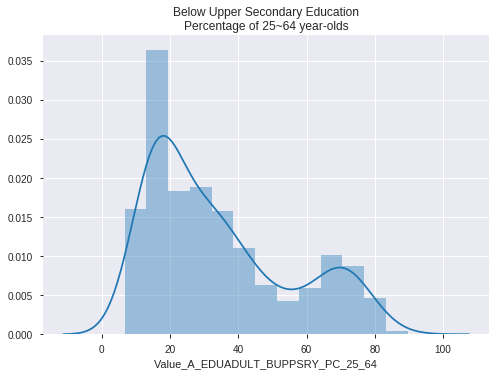

In [67]:
target_below = 'Value_A_EDUADULT_BUPPSRY_PC_25_64'

y_train_below = train_below[target_below]
# Target1's distribution for the train set
plt.title('Below Upper Secondary Education\nPercentage of 25~64 year-olds')
sns.distplot(y_train_below);

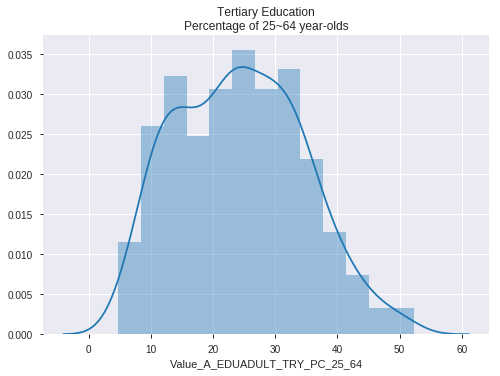

In [68]:
target_tertiary = 'Value_A_EDUADULT_TRY_PC_25_64'

y_train_tertiary = train_tertiary[target_tertiary]
# Target1's distribution for the train set
plt.title('Tertiary Education\nPercentage of 25~64 year-olds')
sns.distplot(y_train_tertiary);

#### Predicting with mean is arbitrarily worse

In [79]:
def baseline_r_score(train, val, target):
  # Determine majority class
  y_train = train[target]
  y_val = val[target]
  # If we guessed the median class for every prediction
  median_class = y_train.median()
  y_pred = np.array([median_class] * len(y_val))
  # baseline accuracy for the validation set
  return r2_score(y_val, y_pred)

print('Baseline r_score for Below education:', baseline_r_score(train_below, val_below, target_below))
print('Baseline r_score for Tertiary education:', baseline_r_score(train_tertiary, val_tertiary, target_tertiary))

Baseline r_score for Below education: -0.0323412071026532
Baseline r_score for Tertiary education: -0.5821231643840348


In [0]:
target_tertiary = 'Value_A_EDUADULT_TRY_PC_25_64'
target_below = 'Value_A_EDUADULT_BUPPSRY_PC_25_64'
# Drop features that are in the same dataset
drop_features = [target_tertiary, target_below, 
                 'Value_A_EDUADULT_UPPSRY_PC_25_64', 
                 'Value_A_EDUADULT_TRY_MEN_PC_25_64', 
                 'Value_A_EDUADULT_TRY_WOMEN_PC_25_64', 
                 'Value_A_EDUADULT_UPPSRY_MEN_PC_25_64', 
                 'Value_A_EDUADULT_UPPSRY_WOMEN_PC_25_64']
features = OECD_df.columns.drop(drop_features)

In [0]:

# LinearRegression with StandardScaler
def linearreg(train, val, test, target):
  X_train = train[features]
  X_val = val[features]
  X_test = test[features]

  y_train = train[target]
  y_val = val[target]
  y_test = test[target]

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)
  y_pred_test = model.predict(X_test)
  model.fit(X_train, y_train)
  print('LinearRegression for', target)
  print('Train Accuracy: ', r2_score(y_train, y_pred_train))
  print('Val Accuracy: ', r2_score(y_val, y_pred_val))
  print('Test Accuracy: ', r2_score(y_test, y_pred_test))

In [98]:
%%time

linearreg(train_below, val_below, test_below, target_below)
linearreg(train_tertiary, val_tertiary, test_tertiary, target_tertiary)

LinearRegression for Value_A_EDUADULT_BUPPSRY_PC_25_64
Train Accuracy:  0.883312848342598
Val Accuracy:  -8.382173500689094
Test Accuracy:  -5.1852798748367235
LinearRegression for Value_A_EDUADULT_TRY_PC_25_64
Train Accuracy:  0.994215320889684
Val Accuracy:  0.9125310749149202
Test Accuracy:  0.9600845140840418
CPU times: user 156 ms, sys: 66 ms, total: 222 ms
Wall time: 159 ms


### XGBRegressor

In [0]:
%%time
def xgbreg(train, val, test, target):
  features = train.columns.drop(drop_features)
  X_train = train[features]
  X_val = val[features]
  X_test = test[features]

  y_train = train[target_tertiary]
  y_val = val[target_tertiary]
  y_test = test[target_tertiary]

  # Use xgboost early_stopping_rounds with the validation set
  warnings.simplefilter(action='ignore', category=FutureWarning)

  eval_set = [(X_train, y_train), 
              (X_val, y_val)]

  model = XGBRegressor(n_estimators=1000, n_jobs=-1)
  model.fit(X_train, y_train, eval_set=eval_set, 
            eval_metric='rmse', early_stopping_rounds=50)

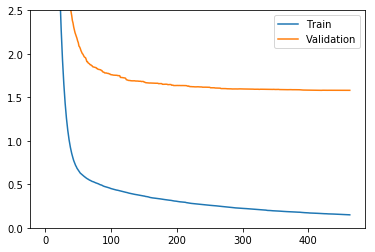

In [66]:
results = model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']
epoch = range(len(train_rmse))
plt.plot(epoch, train_rmse, label='Train')
plt.plot(epoch, val_rmse, label='Validation')
plt.ylim(0.,2.5)
plt.legend();

In [88]:
# XGBRegressor
model = XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

X_train = train_below[features]
y_train = train_below[target_below]
X_val = val_below[features]
y_val = val_below[target_below]
X_test = test_below[features]
y_test = test_below[target_below]

model.fit(X_train, y_train)
print('XGBRegressor for', target_below)
print('Train R^2: ', model.score(X_train, y_train))
print('Validation R^2: ', model.score(X_val, y_val))
print('Test R^2: ', model.score(X_test, y_test))

[21:49:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor for Value_A_EDUADULT_BUPPSRY_PC_25_64
Train R^2:  0.9999232623555372
Validation R^2:  0.7636044942922456
Test R^2:  0.43319772681637553


In [89]:
model = XGBRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

X_train = train_tertiary[features]
y_train = train_tertiary[target_tertiary]
X_val = val_tertiary[features]
y_val = val_tertiary[target_tertiary]
X_test = test_tertiary[features]
y_test = test_tertiary[target_tertiary]

model.fit(X_train, y_train)
print('XGBRegressor for', target_tertiary)
print('Train R^2: ', model.score(X_train, y_train))
print('Validation R^2: ', model.score(X_val, y_val))
print('Test R^2: ', model.score(X_test, y_test))

[21:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor for Value_A_EDUADULT_TRY_PC_25_64
Train R^2:  0.9999847644988081
Validation R^2:  0.9754456360440045
Test R^2:  0.9446663536190351


## Plot model interpretation visualizations for Tertiary education

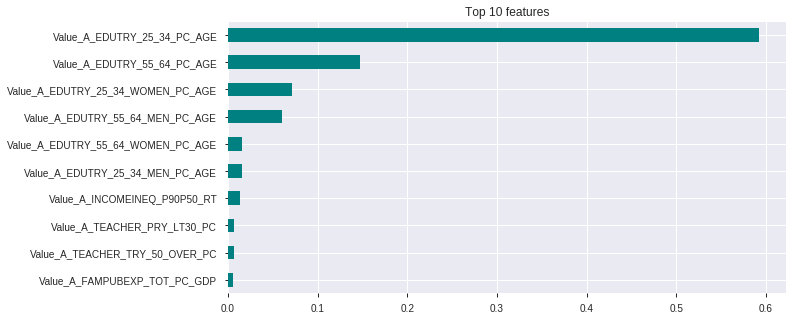

In [90]:
# Get feature importances
importances = pd.Series(model.feature_importances_, X_train.columns)
# Plot feature importances
n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='teal');

In [91]:
permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=10, random_state=42)

permuter.fit(X_val, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
50.8749 ± 8.1681,Value_A_EDUTRY_25_34_PC_AGE
18.0413 ± 2.5601,Value_A_EDUTRY_55_64_PC_AGE
8.7839 ± 1.7418,Value_A_EDUTRY_55_64_MEN_PC_AGE
7.8006 ± 1.9084,Value_A_EDUTRY_25_34_WOMEN_PC_AGE
1.5122 ± 0.4219,Value_A_EDUTRY_55_64_WOMEN_PC_AGE
0.8310 ± 0.2211,Value_A_EDUTRY_25_34_MEN_PC_AGE
0.2271 ± 0.0797,Value_A_TEACHINGSTAFF_EARLYCHILDEDU_NBR
0.1162 ± 0.0370,Value_A_TEACHER_SRY_30_49_PC
0.0845 ± 0.0930,Value_A_TEACHER_TRY_50_OVER_PC
0.0823 ± 0.0861,Value_A_SOCBENHH_INCASH_PC_GDP


### Partial Dependency Plot, 1 feature isolation

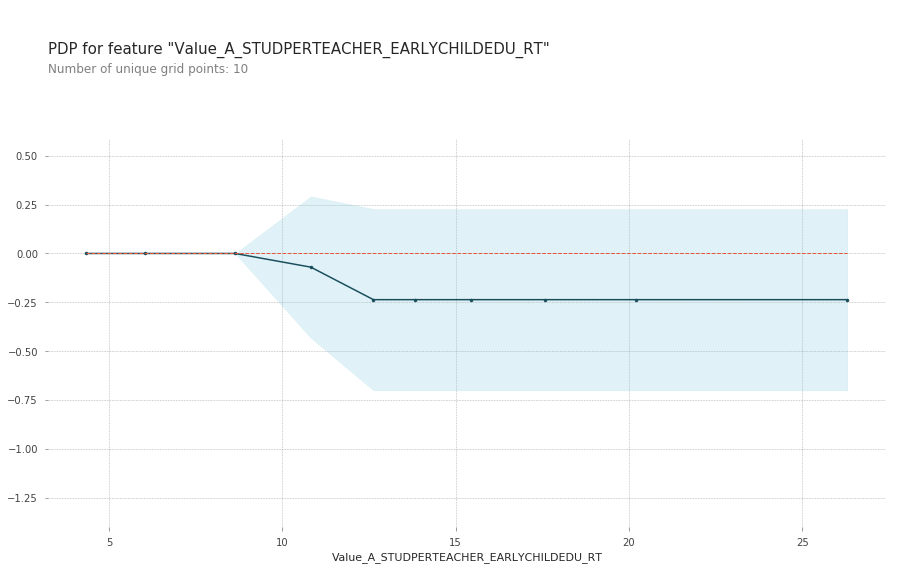

In [62]:
feature = 'Value_A_STUDPERTEACHER_EARLYCHILDEDU_RT'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

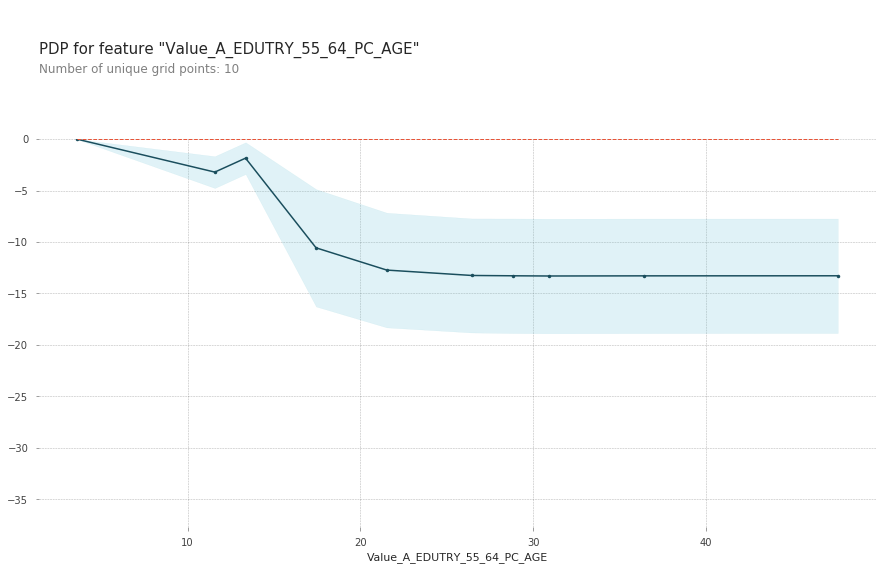

In [63]:
feature = 'Value_A_EDUTRY_55_64_PC_AGE'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

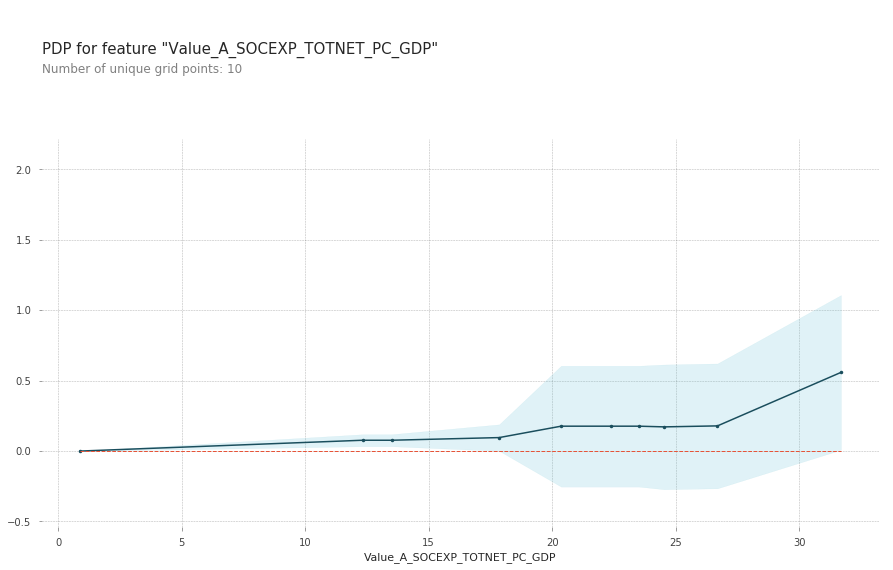

In [59]:
feature = 'Value_A_SOCEXP_TOTNET_PC_GDP'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

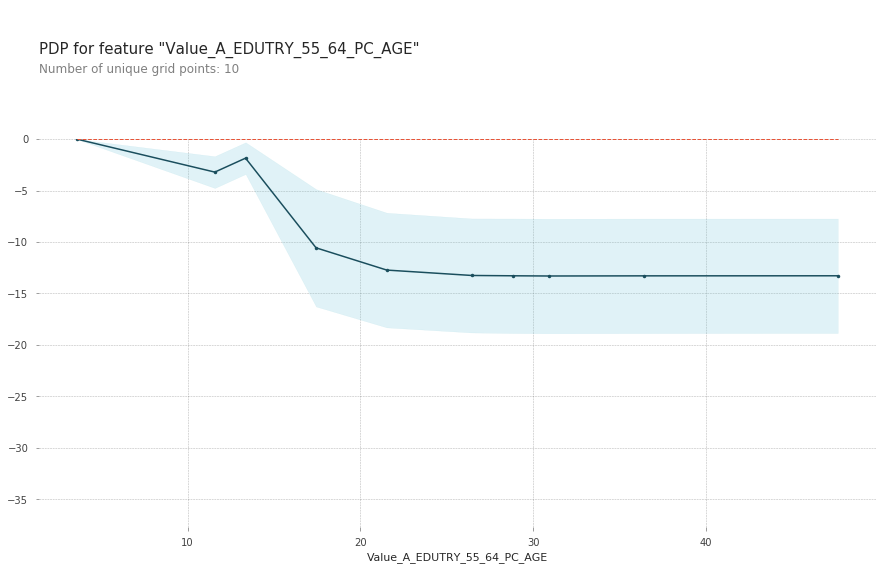

In [60]:
feature = 'Value_A_EDUTRY_55_64_PC_AGE'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

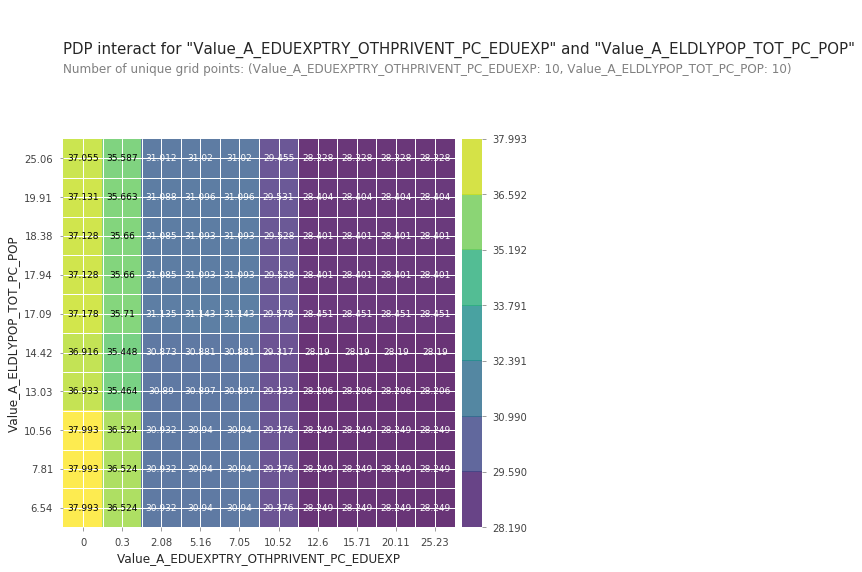

In [66]:
features = ['Value_A_EDUEXPTRY_OTHPRIVENT_PC_EDUEXP', 'Value_A_ELDLYPOP_TOT_PC_POP']

interaction = pdp_interact(
    model=model, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);